Feito por: Felipe Teodoro Bandeira
Data: 27/05/2024
Análise Exploratória de Dados (EDA)
Objetivo: Realizar uma análise exploratória no cojunto de dados Titanic.
Passos:
Utilizar data set titanic
Limpeza e preparação dos dados (tratamento de valores ausentes e colunas desnecessárias).
Análise estatística descritiva (média, mediana, moda, desvio padrão, etc.).
Criação de gráficos para visualizar os dados usando matplotlib e seaborn (histogramas, gráficos de barras, boxplots e gráfico de dispersão).



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Realizando a importação do data frame

In [3]:
#Lendo o data frame teste.csv
train_data = pd.read_csv("test.csv")

In [4]:
#Análise inicial para saber do que se trata
#Colunas: ID, Classe, nome, genero, idade, Não sei, n sei, nmr do ticket
#Tarifa, cabine e se embarcou
train_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
#Vendo informações gerais 
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
#Formato dos dados
print(train_data.info)

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [7]:
#Verificar quantidade de dados
print(train_data.shape)


(418, 11)


Limpeza de dados

In [8]:
#Verificação de dados
#Muitas idades faltantes
#Cabine não aparece, pois mistura numero e letra
print(train_data.isnull(). sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [9]:
#Preencher valores da idade
#inplace= True serve para alterar o df original
train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())

#Dropar a coluna Cabine pois não terá nenhum valor
train_data.drop(columns="Cabin", inplace=True)

#Fazer uma média da tarifa para completar o 1 dado faltante da tabela Fare
train_data["Fare"] = train_data["Fare"].fillna(train_data["Fare"].mean())


In [10]:
#Verificar se acabaram os NA
train_data. isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Realizando análise descritiva

In [11]:
#Estatística com as tabelas numéricas
#Tabela age
#Média = 30.27
#Desvio padrão= 12.63
#Moda = 30.27
train_data["Age"]. describe()

count    418.000000
mean      30.272590
std       12.634534
min        0.170000
25%       23.000000
50%       30.272590
75%       35.750000
max       76.000000
Name: Age, dtype: float64

In [12]:
#Tabela Fare
train_data["Fare"].describe()

count    418.000000
mean      35.627188
std       55.840500
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [13]:
#Ver dados de quem sobreviveu
survived= pd.read_csv("gender_submission.csv")

In [14]:
#Ver quantos sobreviveram
#Só 152 sobreviveram
survived["Survived"].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

Realização de gráficos

Considerações: Seaborn tem estéticas mais bonitas, integração aprimorada com pandas e paletas melhores quando comparadas com o matplotlib

In [15]:
#Definindo especificações dos gráficos
sns.set(style="whitegrid")


Histograma

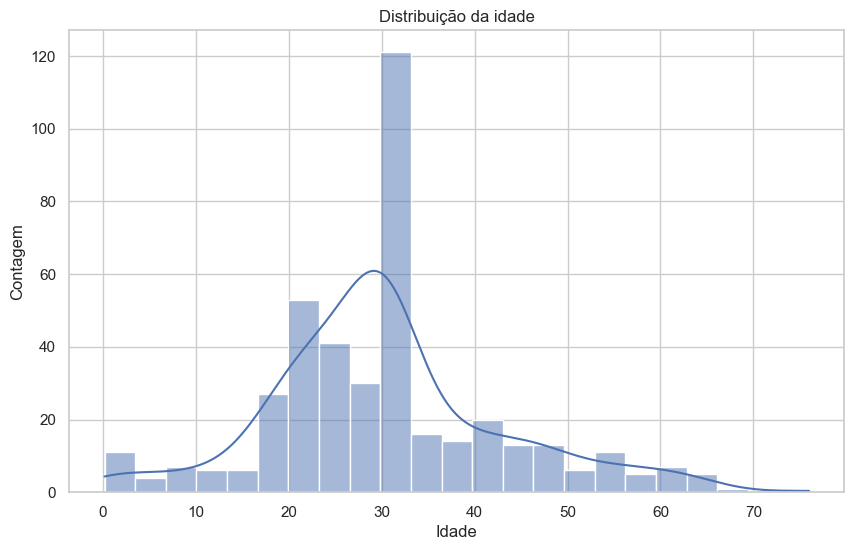

In [16]:
#Construção de um Histrograma
plt.figure(figsize=(10,6))
#Tentativa de aproximar para uma curva normal
sns.histplot(train_data["Age"], kde=True)
plt.title("Distribuição da idade")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()
#Como podemos perceber boa parte dos passageiros tinham em torno de 30 anos

Contagem de sobreviventes, por meio da união entre duas tabelas

In [17]:
#Juntar as tabelas Train data e gender submission
#Para saber quantos sobreviveram pelo gráfico
#Semelhante ao INNER JOIN do SQL
juntar_df= pd.merge(train_data,survived, on="PassengerId"     )

In [18]:
#Conferindo alteração
juntar_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1


C:\Users\teodo\AppData\Local\Temp\ipykernel_24204\1128161587.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x="Survived", data=juntar_df,palette=palette)


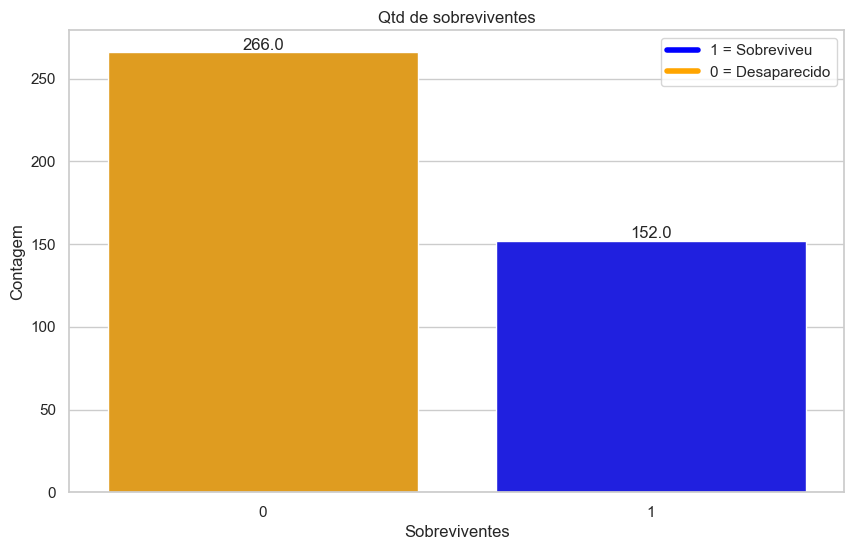

In [19]:
#Gráfico Sobreviventes

#Definir cores  
palette = {"0": 'orange', "1": 'blue'}
plt.figure(figsize=(10,6))
ax=sns.countplot(x="Survived", data=juntar_df,palette=palette)
plt.title("Qtd de sobreviventes")
plt.xlabel("Sobreviventes")
plt.ylabel("Contagem")

#Definir a contagem nas barras
for p in ax.patches:#Lista de objetos que representa as barras do gráfico, o loop percorre cada barra
    height = p.get_height()# Serve para obter a altura da barra, ou seja, a contagem de ocorrências
    #Ax.annotate = fazer anotações no gráfico
    ax.annotate(f'{height}', xy=(p.get_x() + p.get_width() / 2., height),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')
    
#Adicionar legendas no gráfico
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color='blue', lw=4, label='1 = Sobreviveu'),Line2D([0], [0], color='orange', lw=4, label='0 = Desaparecido')]

ax.legend(handles=legend_elements, loc='upper right')
plt.show()

C:\Users\teodo\AppData\Local\Temp\ipykernel_24204\3867562870.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Pclass", y= "Age", data=train_data, palette=cores)


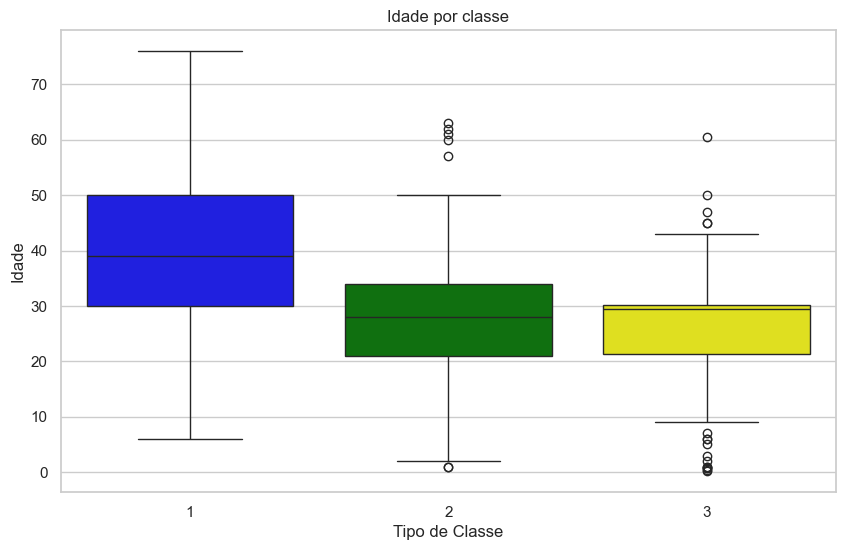

In [20]:
#BOXPLOT
cores = {'1': 'blue', '2': 'green', '3': 'yellow'}
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass", y= "Age", data=train_data, palette=cores)
plt.title("Idade por classe")
plt.xlabel("Tipo de Classe")
plt.ylabel("Idade")
plt.show()

Podemos inferir que na 1° Classe a mediana está em 39
Na 2° classe a mediana está em aproximadamente 27
Na 3° classe a mediana está em 29
Além de termos alguns outliers

Gráfico de dispersão

Análise exploratória para ver se encontramos uma relação entre idade e valor da tarifa, para ver se foi algo determinante para
a sua sobrevivência, mesmo sabendo que a chance de relação é baixa e somente ocmo exemplo


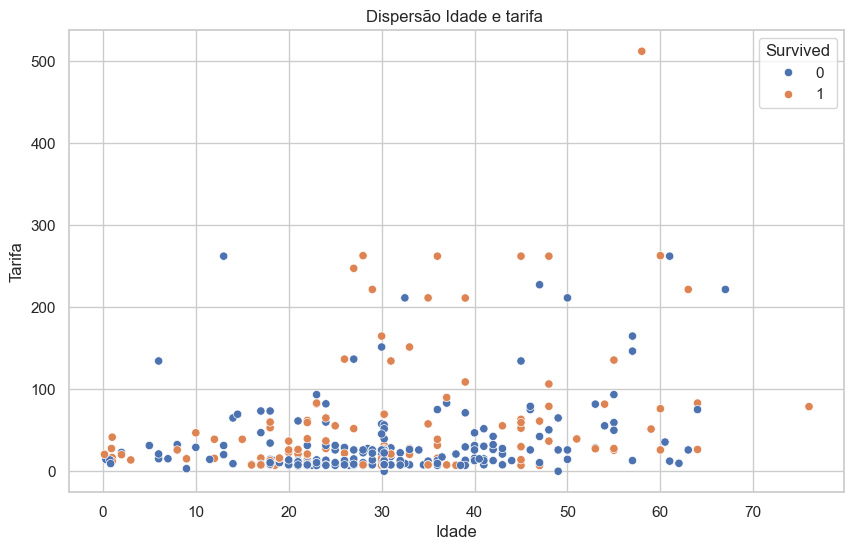

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Age", y= "Fare", hue="Survived",data=juntar_df)
plt.title("Dispersão Idade e tarifa ")
plt.xlabel("Idade")
plt.ylabel("Tarifa")
plt.show()